AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [3]:
import pandas as pd 

df = pd.read_csv('titanic.csv')

print(df.head(10).to_string())

print(df.tail(20).to_string())

print(df.info())

print(df.describe().to_string())



   PassengerId Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1        0       3                              Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171     7.25   NaN        S
1            2        1       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3        1       3                               Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282    7.925   NaN        S
3            4        1       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803     53.1  C123        S
4            5        0       3                             Allen, Mr. William Henry    male  35.0      0      0            373450     8.05   NaN        S
5            6        0       3                                     Mo

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


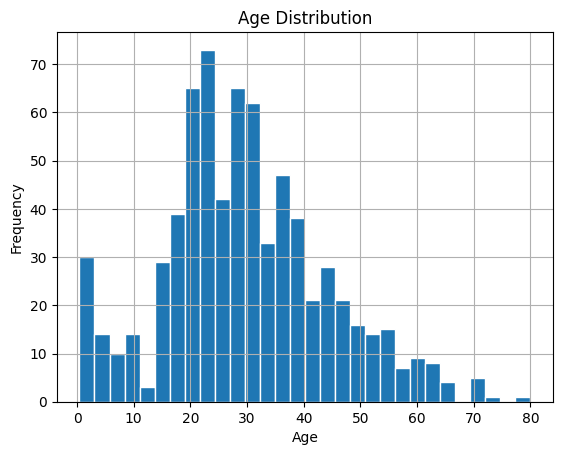

Mean Age: 29.69911764705882
Median Age: 28.0
object
['0' '1' 'Zero' 'One']
object
0


C:\Users\王语诚\AppData\Local\Temp\ipykernel_17500\1501795695.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\王语诚\AppData\Local\Temp\ipykernel_17500\1501795695.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

missing_values_count = df.isnull().sum()

print(missing_values_count)

df['Age'].hist(edgecolor = 'white',bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

mean_age = df['Age'].mean()
median_age = df['Age'].median()
print(f'Mean Age: {mean_age}')
print(f'Median Age: {median_age}')

df['Age'].fillna(median_age, inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)

most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

print(df['Survived'].dtype)
incorrect_values = df[(df['Survived'] != 0) & (df['Survived'] != 1)]
print(incorrect_values['Survived'].unique())
df = df[(df['Survived'] == 0) | (df['Survived'] == 1)]

print(df['Fare'].dtype)
print(df['Fare'].isnull().sum())
df['Fare'] = df['Fare'].str.replace(',', '').astype(float)
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Pclass
1    84.662872
2    20.561977
3    13.685594
Name: Fare, dtype: float64


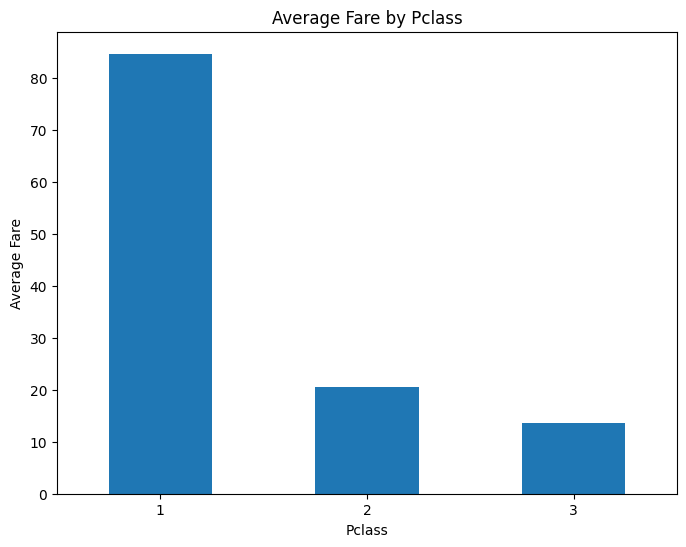

Sex
female    44.456972
male      25.531518
Name: Fare, dtype: float64


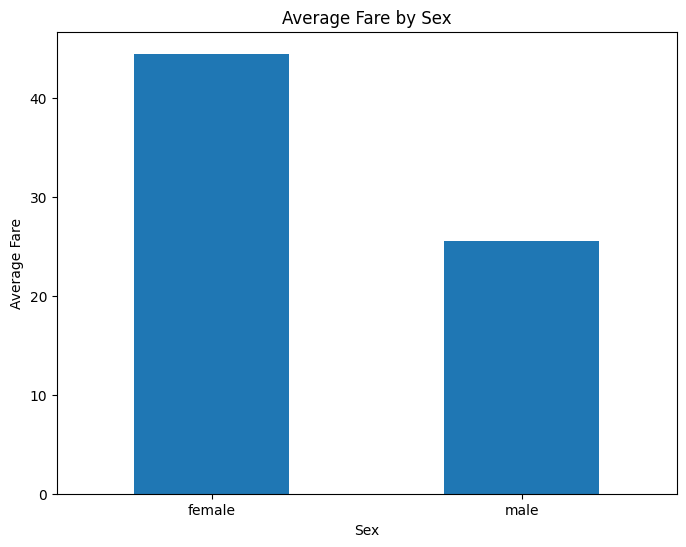

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

df['Fare'] = pd.to_numeric(df['Fare'].str.replace(',', ''), errors='coerce')
median_fare = df['Fare'].median()
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print(average_fare_by_pclass)
average_fare_by_pclass.plot(kind='bar', title='Average Fare by Pclass', figsize=(8, 6))
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

df['Sex'] = df['Sex'].str.lower()
df = df[df['Sex'].isin(['male', 'female'])]
average_fare_by_sex = df.groupby('Sex')['Fare'].mean()
print(average_fare_by_sex)
average_fare_by_sex.plot(kind='bar', title='Average Fare by Sex', figsize=(8, 6))
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

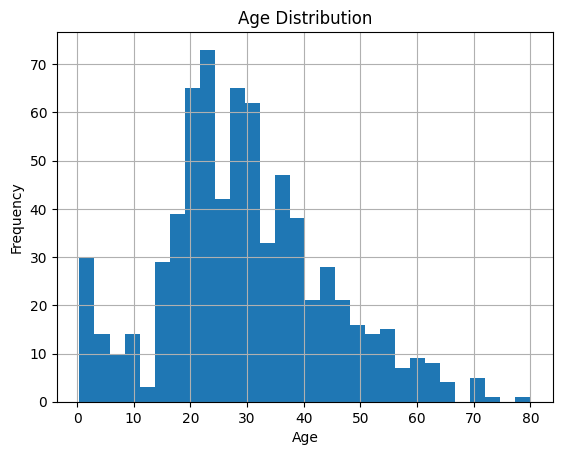

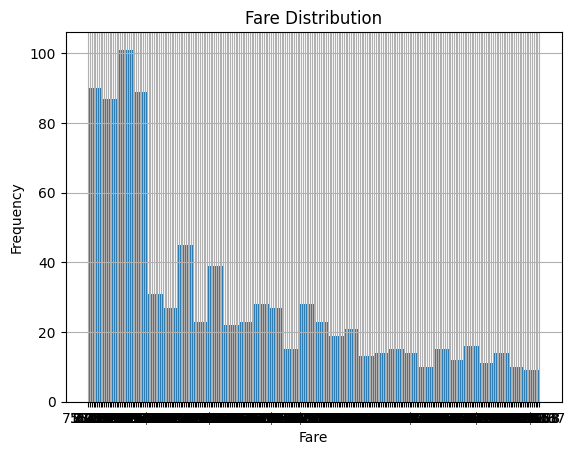

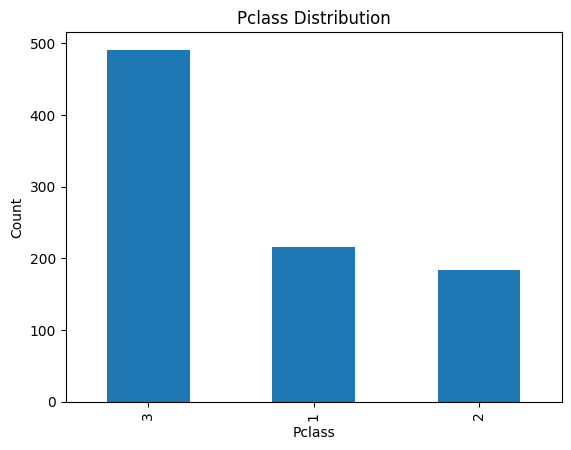

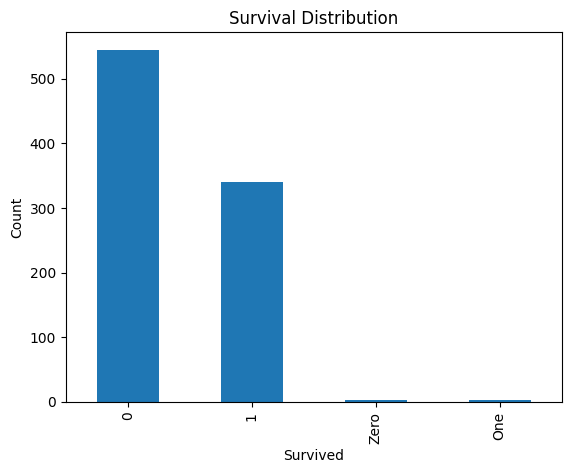

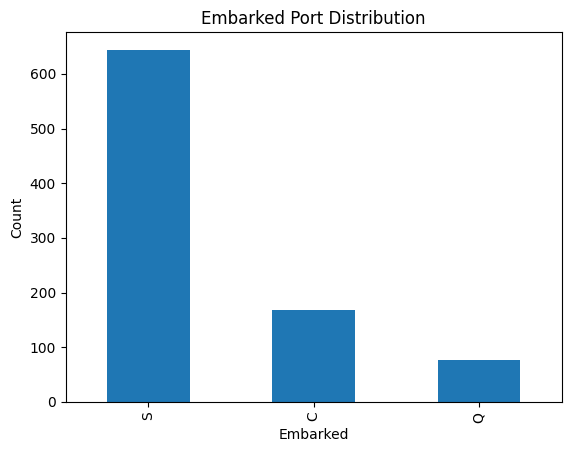

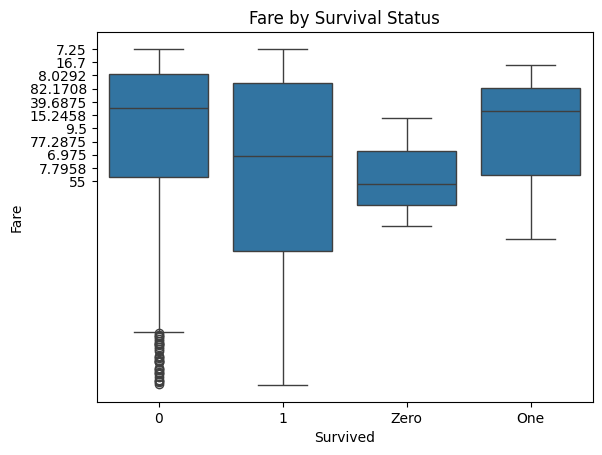

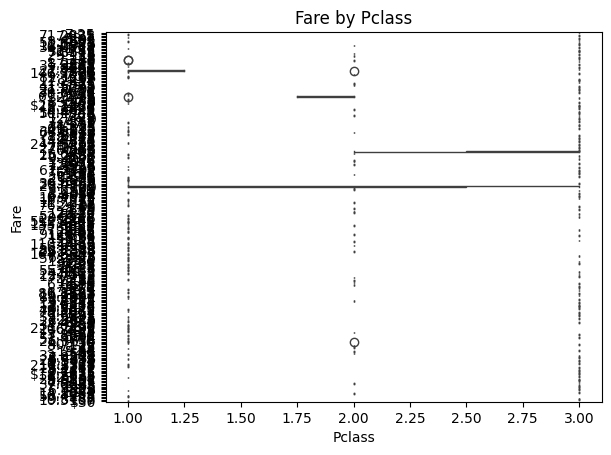

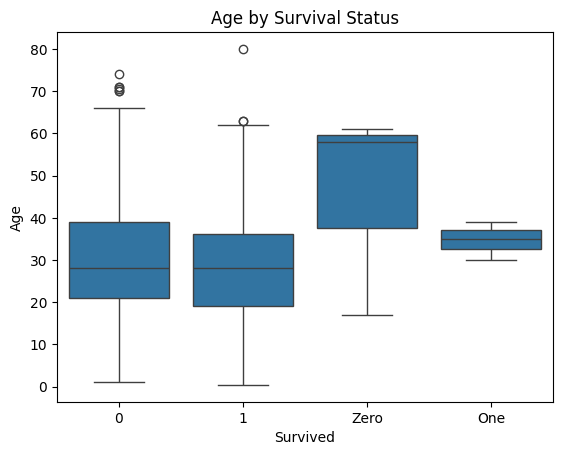

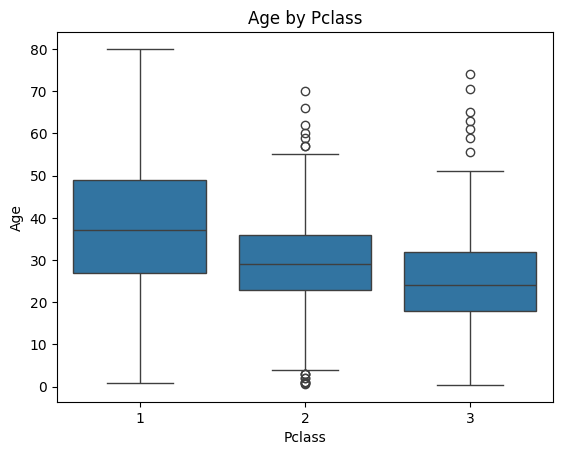

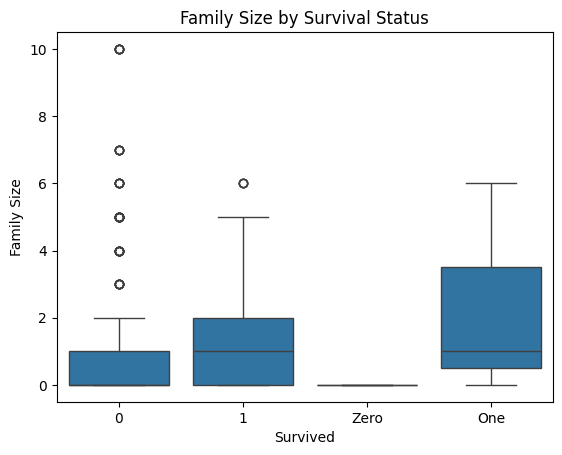

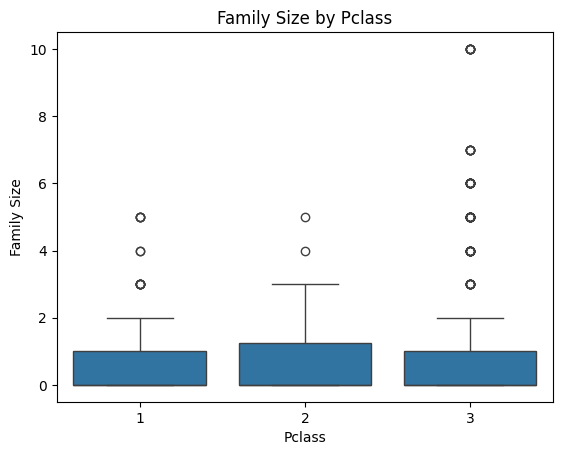

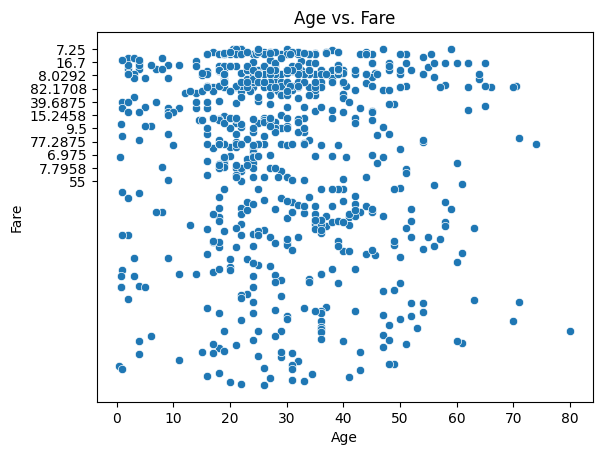

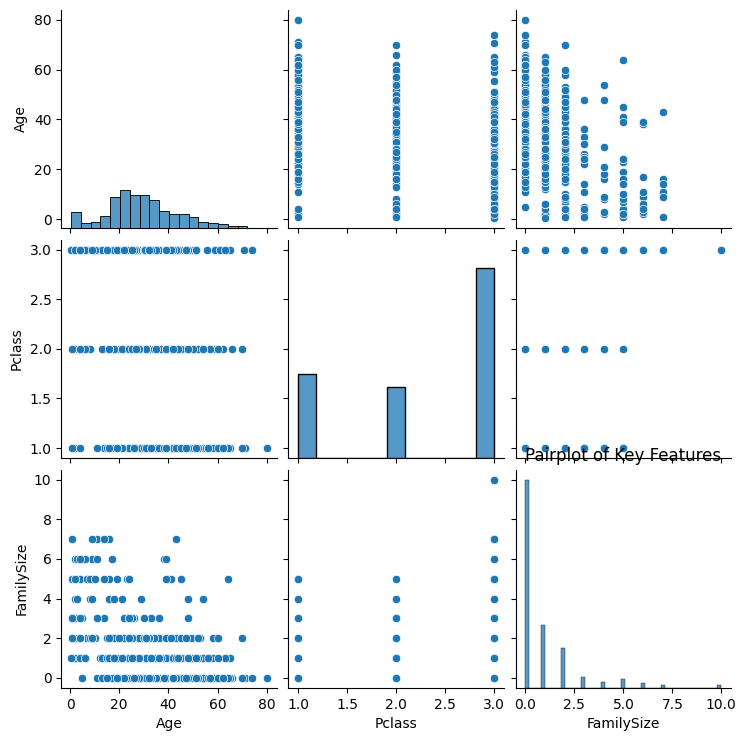

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('titanic.csv')

# Age Distribution
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Fare Distribution
df['Fare'].hist(bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Pclass Distribution
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Survival Distribution
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Embarked Distribution
df['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarked Port Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Fare by Survival Status
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.yticks(np.arange(0, 101, 10))
plt.show()

# Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.yticks(np.arange(0, 101, 10))
plt.show()

# Age by Survival Status
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# Combine SibSp and Parch, Average Family Size by Survival
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.boxplot(x='Survived', y='FamilySize', data=df)
plt.title('Family Size by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.show()

# Family Size by Pclass
sns.boxplot(x='Pclass', y='FamilySize', data=df)
plt.title('Family Size by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Family Size')
plt.show()

# Age vs. Fare
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.yticks(np.arange(0, 101, 10))
plt.show()

# Pairplot for relationships
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived', 'FamilySize']])
plt.title('Pairplot of Key Features')
plt.show()



AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object


C:\Users\王语诚\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\王语诚\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\王语诚\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\王语诚\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


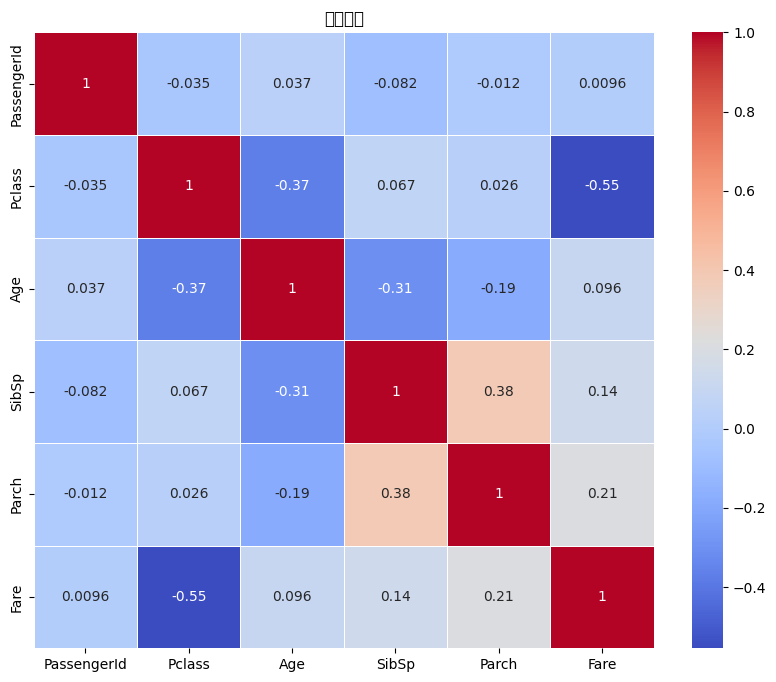

Age 和 Fare 之间的相关性: 0.09606669176903894
             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035349  0.036847 -0.082398 -0.011617  0.009592
Pclass         -0.035349  1.000000 -0.369226  0.067247  0.025683 -0.554182
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.082398  0.067247 -0.308247  1.000000  0.383820  0.138329
Parch          -0.011617  0.025683 -0.189119  0.383820  1.000000  0.205119
Fare            0.009592 -0.554182  0.096067  0.138329  0.205119  1.000000


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

print(df.dtypes)

df['Fare'] = df['Fare'].replace('[\$,]', '', regex=True).astype(float)

numeric_df = df.select_dtypes(include=['float64', 'int64'])

numeric_df = numeric_df.dropna()

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

correlation_age_fare = numeric_df['Age'].corr(numeric_df['Fare'])
print(f"Correlation between Age and Fare: {correlation_age_fare}")

print(correlation_matrix)
